<a href="https://colab.research.google.com/github/joseabdob/Series-de-tiempos/blob/main/inflacion_mex_JA_a01235512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jose Abdo
#A01235512
#13/03/2023
# Pronostico de inflacion

In [2]:
# importamos las librerias de siempre
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# importamos las librerias de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [4]:
inflacion_mex = pd.read_csv('/content/drive/MyDrive/aaaaaa/inflacion_mex_12.csv')

In [5]:
#tamaño de graficas
plt.rcParams['figure.figsize']=[12,6]

In [6]:
inflacion_mex.head()

,fecha,inflacion_12
0,2000/01,11.02
1,2000/02,10.52
2,2000/03,10.11
3,2000/04,9.73
4,2000/05,9.48


In [7]:
inflacion_mex['fecha']= pd.to_datetime(inflacion_mex['fecha'], format= "%Y/%m")

In [8]:

inflacion_mex=inflacion_mex.set_index('fecha')

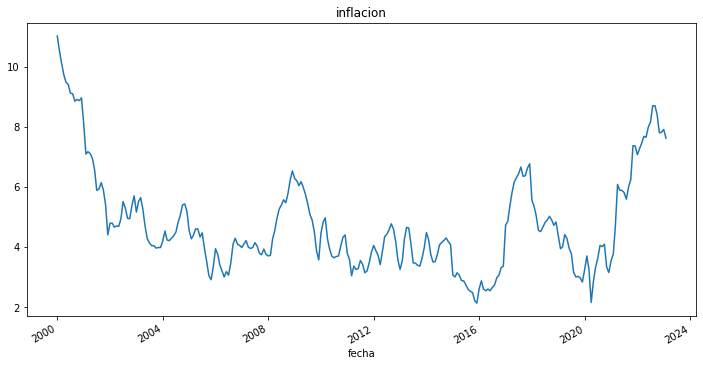

In [9]:
#grafica tipo de cambio
inflacion_mex['inflacion_12'].plot()
plt.title('inflacion')
plt.show()

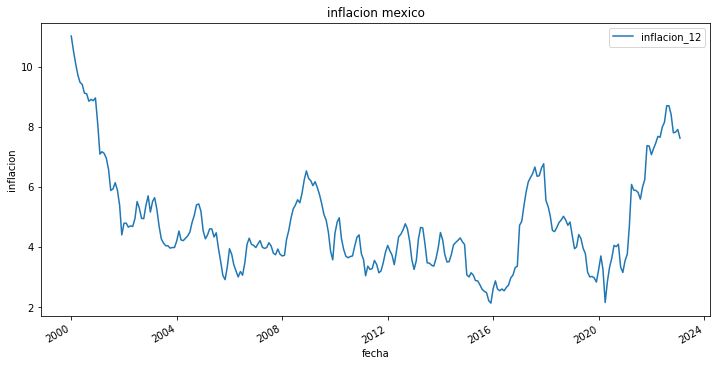

In [10]:
#grafica de serie
inflacion_mex.plot()
plt.title('inflacion mexico')
plt.xlabel('fecha')
plt.ylabel('inflacion')
plt.show()

In [11]:
inflacion_mex.dropna(inplace=True)

In [12]:
result_adf = adfuller(inflacion_mex['inflacion_12'])
print('p-value: %.2f' % result_adf[1])

p-value: 0.05


In [15]:
inflacion_mex['inflacion diff'] = inflacion_mex['inflacion_12'].diff()

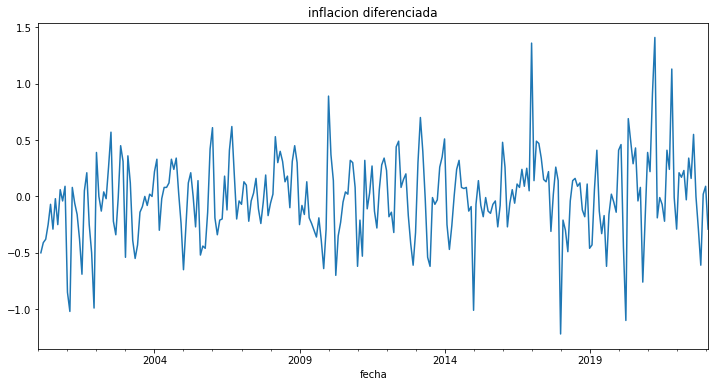

In [16]:
inflacion_mex['inflacion diff'].plot()
plt.title ('inflacion diferenciada')
plt.show()

In [17]:
inflacion_mex.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', name='fecha', length=278, freq=None)

In [18]:
inflacion_mex.index.freq = 'MS'

In [19]:
inflacion_mex['inflacion diff'].dropna(inplace=True)

In [1]:
result_adf = adfuller(inflacion_mex['inflacion diff'])
print('p-value: %.2f' % result_adf[1])

NameError: ignored

aceptamos

<AxesSubplot:xlabel='fecha'>

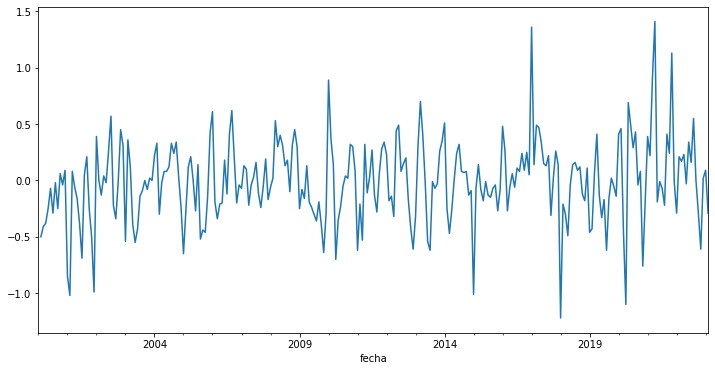

In [20]:
inflacion_mex['inflacion diff'].plot()

In [22]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(inflacion_mex['inflacion diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AR: 2, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/

AR: 3, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
3  4   172.715337  205.331495
4  4   173.379139  209.619314
3  2   177.824847  203.192970
   3   178.359862  207.352002
4  2   180.936431  209.928571
   3   181.214534  213.830692
1  4   181.386305  206.754427
4  1   182.928570  208.296693
2  3   183.895535  209.263658
   4   188.762659  217.754799
0  1   195.301092  206.173144
2  0   195.623104  210.119174
3  0   196.886055  215.006143
2  1   197.035040  215.155128
0  2   197.052927  211.548997
1  1   197.136063  211.632133
0  3   197.784654  215.904742
   4   198.814835  220.558940
1  0   198.845978  209.718031
2  2   198.854833  220.598938
4  0   198.885786  220.629891
3  1   198.885917  220.630022
1  2   199.235174  217.355262
   3   199.371844  221.115949
0  0   225.875902  233.123937

In [24]:
modelo2 = ARIMA(inflacion_mex['inflacion_12'], order=(3, 1, 4)) ##AR (4,4)
resultado2 = modelo2.fit() #calcula
print(resultado2.summary() ) #muestra

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           inflacion_12   No. Observations:                  278
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 -84.422
Date:                Tue, 14 Mar 2023   AIC                            184.844
Time:                        13:27:12   BIC                            213.836
Sample:                    01-01-2000   HQIC                           196.477
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6070      0.518     -1.172      0.241      -1.623       0.408
ar.L2          0.2398      0.694      0.345      0.730      -1.121       1.601
ar.L3          0.0916      0.370      0.247      0.8

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
inflacion_mex['inflacion pronosticado'] = resultado2.predict()

In [26]:
inflacion_mex

,inflacion_12,inflacion diff,inflacion pronosticado
fecha,,,
2000-01-01,11.02,NaN,0.000000
2000-02-01,10.52,-0.50,11.020001
2000-03-01,10.11,-0.41,10.346839
2000-04-01,9.73,-0.38,10.016067
2000-05-01,9.48,-0.25,9.659550
...,...,...,...
2022-10-01,8.41,-0.29,8.611506
2022-11-01,7.80,-0.61,8.278932
2022-12-01,7.82,0.02,7.523067


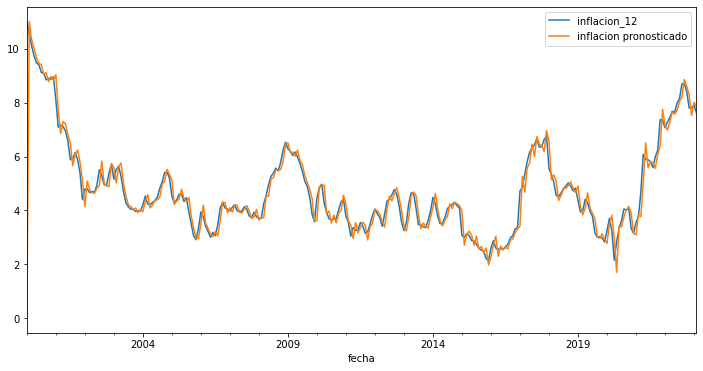

In [27]:
inflacion_mex[['inflacion_12', 'inflacion pronosticado']].plot();

In [28]:
inflacion_mex.tail()

,inflacion_12,inflacion diff,inflacion pronosticado
fecha,,,
2022-10-01,8.41,-0.29,8.611506
2022-11-01,7.80,-0.61,8.278932
2022-12-01,7.82,0.02,7.523067
2023-01-01,7.91,0.09,8.016285
2023-02-01,7.62,-0.29,7.861750


In [37]:
resultado2.predict(278, 288)

2023-03-01    7.586835
2023-04-01    7.500028
2023-05-01    7.599708
2023-06-01    7.566370
2023-07-01    7.602558
2023-08-01    7.581728
2023-09-01    7.599996
2023-10-01    7.587227
2023-11-01    7.597450
2023-12-01    7.589856
2024-01-01    7.595748
Freq: MS, Name: predicted_mean, dtype: float64